<h1 style="color: #f05a5b; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', sans-serif; font-weight: bold;">
    Experimenting with Inflation
</h1>

In [1]:
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import os
import pycel
from pycel import ExcelCompiler
import pandas as pd


filename = r'simple simulator unemployment.xlsx'
plt.style.use('seaborn-poster')

In [2]:
excel = ExcelCompiler(filename=filename,cycles=True)

Initialized with cycles: True, while workbook says: False


In [3]:
shock_size = excel.evaluate('simulator!L7')
no_policy = excel.evaluate('simulator!A1:J30')
before_policy = excel.evaluate('simulator!A1:J6')
after_policy = excel.evaluate('simulator!A1:J7')
# to display use display(); for dataframe have to save and open with pandas

In [4]:
def PlotStuff(exceloutputs:list, title, after = False, show=True, auto=False, legend=False):
    '''Plots inflation and unemployment on side-by-side subplots'''
    colourlist = ['b', 'grey', 'pink']
    figs, axs = plt.subplots(1, 4, figsize=[24, 8])
    for data in exceloutputs:
        colour = colourlist[exceloutputs.index(data)]
        if after:
            axs[0].plot([data[i][0] for i in range(1, len(data)-1)], [data[i][4] for i in range(1, len(data)-1)], colour)
            axs[1].plot([data[i][0] for i in range(1, len(data)-1)], [data[i][3] for i in range(1, len(data)-1)], colour)
            axs[2].plot([data[i][0] for i in range(1, len(data)-1)], [data[i][-1] for i in range(1, len(data)-1)], colour)
            axs[3].plot([data[i][0] for i in range(1, len(data)-2)], [data[i][-3] for i in range(1, len(data)-2)], colour)
            axs[0].plot([data[-2][0], data[-1][0]], [data[-2][4], data[-1][4]], 'r')
            axs[1].plot([data[-2][0], data[-1][0]], [data[-2][3], data[-1][3]], 'r')
            axs[2].plot([data[-2][0], data[-1][0]], [data[-2][-1], data[-1][-1]], 'r')
            axs[3].plot([data[-3][0], data[-2][0]], [data[-3][-3], data[-2][-3]], 'r')

        else:
            axs[0].plot([data[i][0] for i in range(1, len(data))], [data[i][4] for i in range(1, len(data))], colour)
            axs[1].plot([data[i][0] for i in range(1, len(data))], [data[i][3] for i in range(1, len(data))], colour)
            axs[2].plot([data[i][0] for i in range(1, len(data))], [data[i][-1] for i in range(1, len(data))], colour)
            axs[3].plot([data[i][0] for i in range(1, len(data))], [data[i][-3] for i in range(1, len(data))], colour)
            axs[0].plot(data[-1][0] + 1, data[-1][4])
            axs[1].plot(data[-1][0] + 1, data[-1][3])
            axs[2].plot(data[-1][0] + 1, data[-1][-1])
    axs[0].set_title('Inflation')
    axs[1].set_title('GDP')
    axs[2].set_title('Unemployment')
    axs[3].set_title('Real Interest Rate')
    axs[0].set_xlabel('Period')
    axs[1].set_xlabel('Period')
    axs[2].set_xlabel('Period')
    axs[3].set_xlabel('Period')

    if not auto:
        axs[0].set_ylim(bottom=1.5, top=8.5)
        axs[1].set_ylim(bottom=93.5, top=100.5)
        axs[2].set_ylim(bottom=0.04, top=0.11)
        axs[3].set_ylim(bottom=0.5, top=7.5)


    figs.suptitle(title, fontsize=16)
    
    if legend:
        label1 = mlines.Line2D([], [], color='b', label='chosen props')
        label2 = mlines.Line2D([], [], color='grey', label='benchmark props')
        axs[3].legend(handles=[label1, label2], bbox_to_anchor=(1, 1), bbox_transform=figs.transFigure)

    if show:
        plt.show()
    else:
        return figs, axs

def AppendtoPlot(figs, axs, new_excel):
    axs[0].plot([new_excel[i][0] for i in range(1, len(new_excel))], [new_excel[i][4] for i in range(1, len(new_excel))])
    axs[1].plot([new_excel[i][0] for i in range(1, len(new_excel))], [new_excel[i][3] for i in range(1, len(new_excel))])
    axs[2].plot([new_excel[i][0] for i in range(1, len(new_excel))], [new_excel[i][-1] for i in range(1, len(new_excel))])
    axs[3].plot([new_excel[i][0] for i in range(1, len(new_excel))], [new_excel[i][-3] for i in range(1, len(new_excel))])
    return figs, axs
    


[video]

Sint quis consequat id laborum aliqua duis dolor cupidatat minim reprehenderit deserunt qui. Et esse do incididunt eu ea deserunt. Tempor adipisicing quis culpa sunt dolore id consectetur cupidatat laborum nulla anim occaecat culpa. Et irure deserunt eu dolore labore laborum. Dolor et officia duis incididunt eiusmod cupidatat fugiat nulla.

Duis exercitation commodo anim occaecat culpa anim minim qui sit occaecat eu excepteur magna. Deserunt anim nisi qui cupidatat laborum aliqua cupidatat pariatur. Ex labore duis mollit qui. Tempor minim proident ea elit aliquip. Irure id commodo fugiat reprehenderit aliquip fugiat ex officia sint ad veniam adipisicing. Velit quis ex laboris pariatur pariatur deserunt ea dolore labore aute quis. Adipisicing nostrud non reprehenderit aliqua ex ad reprehenderit amet voluptate cupidatat ad ullamco esse.

Sunt esse quis sint consectetur. Eu est mollit voluptate ullamco qui. Cupidatat sint incididunt exercitation eu eiusmod aute occaecat voluptate in dolor duis exercitation anim. Lorem laborum mollit nulla minim nulla officia fugiat ex enim enim. Qui irure nostrud occaecat deserunt.

<h2 style="color: #f05a5b; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', sans-serif; font-weight: bold;">
    No Policy
</h2>

<h3>Here is a non-interactive graph showing the effect of a permanent inflation shock when there is no change in monetary policy.  Needs aesthetics update. </h3>

Elit dolor sunt exercitation incididunt cillum officia sint ullamco non nostrud mollit ea exercitation. Commodo reprehenderit quis culpa est minim duis sunt quis dolor dolore excepteur nostrud adipisicing nostrud. Exercitation cupidatat anim cupidatat amet. Id ea non elit veniam ut aute et fugiat. Dolore eu quis nisi nostrud enim occaecat ad deserunt irure velit fugiat aute nisi culpa.

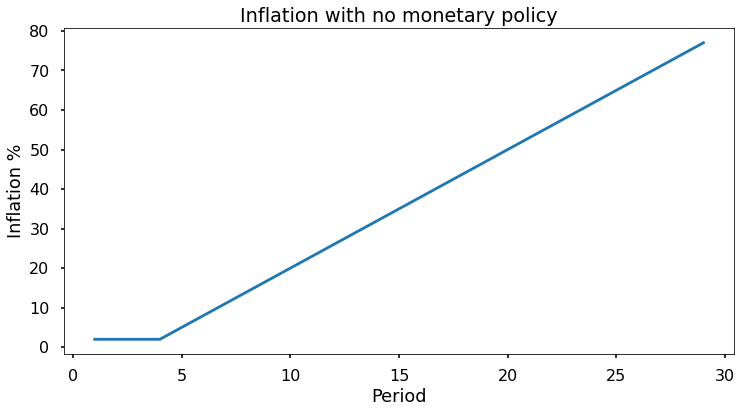

In [5]:
fig, ax = plt.subplots(1, 1, figsize = [12, 6])
ax.plot([no_policy[i][0] for i in range(1, len(no_policy))], [no_policy[i][4] for i in range(1, len(no_policy))])
ax.set_title('Inflation with no monetary policy')
ax.set_ylabel('Inflation %')
ax.set_xlabel('Period')

plt.show()

Aliqua veniam incididunt exercitation Lorem exercitation commodo esse veniam duis amet veniam. Minim aute aute ad eu nulla pariatur officia enim sunt cillum mollit dolore anim. Quis amet veniam labore Lorem amet officia occaecat. Labore qui nulla ex adipisicing. Laboris commodo ex adipisicing consequat enim.

Culpa deserunt excepteur irure anim excepteur dolore. Quis sint duis consectetur consectetur mollit quis amet ex elit adipisicing nisi. Do aliquip incididunt laboris ut. Excepteur eiusmod anim id ipsum.

Deserunt nostrud enim do pariatur in pariatur. Laborum anim sit laborum veniam cupidatat voluptate nostrud non voluptate commodo veniam esse esse. Non amet sint ex nisi aute.

<h2 style="color: #f05a5b; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', sans-serif; font-weight: bold;">
    Interactive Policy
</h2>

<h3>There's been a permanent inflation shock in period 5. Choose a real interest rate to see its effect - you should aim to stabilise inflation.</h3>

In [6]:
out = widgets.Output(layout={'border': '2px solid gray', 'padding': '5px 5px 5px 5px', 'margin': '0 0 0 0'})
display(out)

Output(layout=Layout(border='2px solid gray', margin='0 0 0 0', padding='5px 5px 5px 5px'))

In [7]:
r = widgets.IntSlider(1, 1, 7)
sub = widgets.Button(description='Submit')


with out:
    out.clear_output(wait=True)
    display(r, sub)
    # display(before_policy)
    PlotStuff([before_policy], title='')


def on_sub(b):
    excel.evaluate('simulator!H6')
    chosenrate = r.value
    excel.set_value('simulator!H6', chosenrate)
    excel.recalculate()
    after_policy = excel.evaluate('simulator!A1:J7')
    with out:
        out.clear_output(wait=True)
        display(r, sub)
        print(f'chosen rate {chosenrate} - see below for its effects')
        # display(excel.evaluate('simulator!H6'))
        # display(after_policy)
        PlotStuff([after_policy], title='', after=True)
        if chosenrate == 4:
            print('')
            display(widgets.HTML('<h3>you stabilised inflation - congratulations. however, look at unemployment. ..........</h3>'))
            display(widgets.HTML('<p>Sit eu sunt aliqua occaecat consectetur laboris ipsum quis veniam nostrud consectetur adipisicing. Culpa officia anim consequat exercitation consectetur laboris reprehenderit consequat culpa elit aliquip. Irure laboris sint ea sint voluptate minim nulla quis minim officia consectetur nulla velit. Id elit dolor quis irure amet do minim velit ad amet ea laboris.</p>'))
            print()
            print()
        elif chosenrate == 1:
            print('')
            display(widgets.HTML('<h3>Unemployment is looking healthy - but inflation is still getting higher. This is because ......</h3>'))
            display(widgets.HTML('<p>Esse ad deserunt deserunt sit non consequat ullamco nulla amet. Irure magna nostrud consequat ex pariatur ad aliqua tempor amet dolore et occaecat dolor. Officia non voluptate ex irure amet qui nulla quis fugiat voluptate tempor sint. Laborum anim officia proident duis esse enim officia do aliquip irure do. Reprehenderit et exercitation labore dolore magna ex dolor tempor proident tempor deserunt. Et eiusmod nisi ea esse qui aute et.</p>'))
            print()
            print()
        elif 1 < chosenrate < 4:
            print('')
            display(widgets.HTML('<h3>Inflation is still getting higher, and meanwhile unemployment is getting worse too! this is because ..... </h3>'))
            display(widgets.HTML('<p>Adipisicing ut nisi dolore mollit. Est fugiat do veniam sunt duis non aliqua irure aliqua fugiat commodo ut. Consectetur exercitation pariatur ullamco occaecat duis eiusmod est officia eiusmod. Sit ullamco magna est reprehenderit reprehenderit dolor do non aliquip magna. Incididunt ea tempor nulla est laborum. Exercitation Lorem ullamco in pariatur excepteur enim nulla.</p>'))
            print()
            print()
        elif 4 < chosenrate:
            print('')
            display(widgets.HTML('<h3>Inflation is heading back down to equilibrium - but employment is tanking. ...........?</h3>'))
            display(widgets.HTML('<p>Enim incididunt do veniam velit officia reprehenderit quis commodo. Excepteur voluptate nisi id reprehenderit ullamco proident qui enim voluptate mollit ea quis ipsum eu. Amet ullamco mollit in incididunt ullamco ipsum id id aliqua enim.</p>'))
            print()
            print()


sub.on_click(on_sub)


Consequat aliquip voluptate consequat ea occaecat dolore. Laborum eiusmod ex quis eu qui Lorem consectetur exercitation voluptate laboris quis occaecat irure. Eu sint adipisicing laborum incididunt. Ex labore irure tempor aute tempor aliquip nisi duis ipsum excepteur. Fugiat id mollit id commodo officia qui ea aliqua Lorem aute excepteur.

Cillum officia occaecat nisi veniam eu. Exercitation do eiusmod et commodo ad est dolore aute. Proident irure deserunt dolor culpa occaecat officia sunt consectetur aliqua fugiat deserunt aliqua.

Velit non Lorem cupidatat nostrud occaecat consectetur irure quis quis magna commodo ea. Officia sint irure quis exercitation in sint ad culpa laborum ullamco in do irure enim. Ea aute quis elit magna aliqua esse mollit. Amet veniam ex proident ea nulla cupidatat sit incididunt sit irure. Pariatur dolore ad ea non nostrud consectetur est nostrud qui est commodo fugiat.

In aute occaecat ad cupidatat velit elit consequat deserunt amet proident. Veniam laborum enim sunt consectetur aliqua voluptate. Reprehenderit sunt commodo ut laboris voluptate dolor.

<h1 style="color: #f05a5b; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', sans-serif; font-weight: bold;">
    How an inflation targeting CB gets inflation back to target
</h1>

<h3>Idea is to compare short run/long term benefits/costs of each approach, and realise costly recession is "best"</h3>

In [8]:
excel1 = ExcelCompiler(filename=filename,cycles=True)
excel1.evaluate('simulator!H6')
excel1.set_value('simulator!H6', 1)
excel1.recalculate()
no_change_policy = excel1.evaluate('simulator!A1:J30')
excel2 = ExcelCompiler(filename='simple sim endog cb.xlsx', cycles=True)
timid_policy = excel2.evaluate('timid!A1:K30')
optimal_policy = excel2.evaluate('optimal!A1:K30')


Initialized with cycles: True, while workbook says: False
Initialized with cycles: True, while workbook says: False


In [9]:
out2 = widgets.Output(layout={'border': '2px solid gray', 'padding': '5px 5px 5px 5px', 'margin': '0 0 0 0'})
display(out2)

Output(layout=Layout(border='2px solid gray', margin='0 0 0 0', padding='5px 5px 5px 5px'))

In [10]:
title = widgets.HTML('<h1> Comparing types of central banks </h1>')
dropdown = widgets.Dropdown(options=['CB that wants to avoid higher unemployment despite equilibrium change',
 'CB that slowly accepts change to unemployment', 
 'CB that accepts costly recession and unemployment below equilibrium to prioritise inflation'], value=None, layout={'width': 'max-content'}, description='')

def get_plots(CB):
    if CB == 'CB that wants to avoid higher unemployment despite equilibrium change':
        PlotStuff([no_change_policy[:15]], title='CB that wants to avoid change to unemployment despite equilibrium change', after=False, auto=False)
        display(widgets.HTML('<h2>Unchanging Policy is not sustainable</h2>'))
        display(widgets.HTML('Minim elit velit veniam amet excepteur exercitation ea adipisicing Lorem sunt nulla irure cillum excepteur. Pariatur id anim duis quis ea commodo occaecat enim laboris id amet ad aliqua. Qui dolore ut sit culpa enim eu nulla eiusmod occaecat ipsum officia aute culpa. Nulla irure minim officia ea ex. Ullamco non ex id deserunt qui incididunt aute ex tempor ipsum irure. Qui exercitation mollit consectetur pariatur incididunt est fugiat non pariatur sit magna elit.'))
    elif CB == 'CB that slowly accepts change to unemployment':
        PlotStuff([timid_policy[:15]], title='CB that slowly accepts change to unemployment',after=False)
        display(widgets.HTML('<h2>A slow response has short term benefits with a soft landing, at the expense of permanently high inflation</h2>'))
        display(widgets.HTML('Minim elit velit veniam amet excepteur exercitation ea adipisicing Lorem sunt nulla irure cillum excepteur. Pariatur id anim duis quis ea commodo occaecat enim laboris id amet ad aliqua. Qui dolore ut sit culpa enim eu nulla eiusmod occaecat ipsum officia aute culpa. Nulla irure minim officia ea ex. Ullamco non ex id deserunt qui incididunt aute ex tempor ipsum irure. Qui exercitation mollit consectetur pariatur incididunt est fugiat non pariatur sit magna elit.'))
    elif CB == 'CB that accepts costly recession and unemployment below equilibrium to prioritise inflation':
        PlotStuff([optimal_policy[:15]], title='CB that accepts costly recession and unemployment below equilibrium to prioritise inflation', after=False)
        display(widgets.HTML('<h2>A costly recession, engineered by the CB with high interest rates, brings inflation under control but could be </h2>'))
        display(widgets.HTML('Minim elit velit veniam amet excepteur exercitation ea adipisicing Lorem sunt nulla irure cillum excepteur. Pariatur id anim duis quis ea commodo occaecat enim laboris id amet ad aliqua. Qui dolore ut sit culpa enim eu nulla eiusmod occaecat ipsum officia aute culpa. Nulla irure minim officia ea ex. Ullamco non ex id deserunt qui incididunt aute ex tempor ipsum irure. Qui exercitation mollit consectetur pariatur incididunt est fugiat non pariatur sit magna elit.'))
    else:
        display(widgets.HTML('<h3>Choose a CB behaviour from the Dropdown to see its performance, benefits and costs</h3>'))


with out2:
    out2.clear_output(wait=True)
    display(title)
    widgets.interact(get_plots, CB=dropdown)
    # display(inter)
    # PlotStuff(no_change_policy[:15], title='CB that wants to avoid change to unemployment despite equilibrium change', after=False)
    # PlotStuff(timid_policy[:15], title='CB that slowly accepts change to unemployment',after=False)
    # PlotStuff(optimal_policy[:15], title='CB that accepts costly recession and unemployment below equilibrium to prioritise inflation', after=False)


Aliquip sit cillum tempor ea minim sit excepteur eu. Consectetur et ad nostrud eiusmod sit. Laboris eu aliquip nulla proident ad dolore ipsum proident irure mollit ullamco. Sint amet culpa excepteur deserunt sit officia. Exercitation occaecat deserunt do reprehenderit occaecat cillum ex minim consequat do.

Nulla eiusmod anim magna commodo excepteur. Commodo culpa ut amet reprehenderit sunt sint. Pariatur Lorem voluptate ex labore velit anim occaecat culpa esse qui.

Sit elit laborum culpa Lorem labore. Elit quis velit aliquip sint tempor irure occaecat consectetur ipsum nulla pariatur voluptate mollit. Ea in aliquip cupidatat ut nisi est. Mollit ea elit enim ea in nulla Lorem fugiat incididunt reprehenderit ipsum.

<h1 style="color: #f05a5b; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', sans-serif; font-weight: bold;">
    Experimenting with Inflation Adversity
</h1>

<h3>Now that it's clear how a costly recession is necessary, we introduce CB beta and how inflation adversity affects CB behaviour. </h3>

In [11]:
out3 = widgets.Output(layout={'border': '2px solid gray', 'padding': '5px 5px 5px 5px', 'margin': '0 0 0 0'})
display(out3)

Output(layout=Layout(border='2px solid gray', margin='0 0 0 0', padding='5px 5px 5px 5px'))

Output()

Output()

In [23]:
out3.clear_output()
def betafunc(slider, show_benchmark):
    # global figs, axs
    excel2.evaluate('optimal!M3')
    chosenrate = slider
    excel2.set_value('optimal!M3', chosenrate)
    excel2.recalculate()
    after_policy = excel2.evaluate('optimal!A1:K30')
    # with out3:
    #     out3.clear_output(wait=True)
    #     display(r2, sub2)
    #     print(f'chosen rate {chosenrate} - see below for its effects')
    #     # display(excel.evaluate('optimal!H6'))
    #     # display(after_policy)
    #     PlotStuff([optimal_policy, after_policy], title='', after=False, show=True)
    #     # figs, axs = AppendtoPlot(figs, axs, after_policy)
    #     # plt.show()
    #     display(widgets.HTML('<h3>Officia do duis aute excepteur.</h3>'))
    if show_benchmark:
        PlotStuff([after_policy[:15], optimal_policy[:15]], title='', after=False, auto=False, legend=True)
    else:
        PlotStuff([after_policy[:15]], title='', after=False, auto=False)


beta = widgets.FloatSlider(1, min=0.25, max=4, description='CB beta')
benchmark = widgets.Checkbox(value=False, description='Show benchmark (beta=1)')
outtest = widgets.interactive_output(betafunc, {'slider': beta, 'show_benchmark': benchmark})

with out3:
    out3.clear_output()
    display(beta, benchmark, outtest)



Non reprehenderit irure incididunt ut ullamco ea aliqua reprehenderit. Officia nulla duis anim ea qui in enim velit veniam velit est cupidatat non. Pariatur anim consectetur Lorem ad ea ipsum ex dolor aliqua cupidatat voluptate ut. Fugiat ex velit irure elit laboris nisi ex. Sint duis qui laborum voluptate nostrud ut nulla occaecat aute. Adipisicing sit excepteur incididunt adipisicing excepteur veniam fugiat cupidatat dolor. Adipisicing ipsum voluptate commodo anim.

Cupidatat qui consequat elit aliqua aliquip non commodo deserunt mollit laboris. Sunt consequat id aliqua qui exercitation aliquip labore nostrud in commodo officia velit veniam. Non exercitation amet voluptate eu nisi consequat mollit adipisicing deserunt nulla. Ipsum nostrud et adipisicing ipsum. Deserunt sint et duis anim duis adipisicing anim quis ullamco officia. Non voluptate ex deserunt pariatur dolor id labore reprehenderit dolore commodo fugiat enim.

Quis est dolore non culpa exercitation officia cillum dolore laboris dolor id adipisicing consectetur. Ullamco labore irure voluptate ex fugiat in aliqua et non sint esse Lorem id. Ad consectetur in officia esse proident elit veniam nisi nisi. Sit velit in proident anim fugiat. Elit nulla tempor fugiat consequat.

<h1 style="color: #f05a5b; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', sans-serif; font-weight: bold;">
    Inflation Expectations
</h1>

<h3>Inflation recovery is not just dependent on CB. Households and firms' expectations about inflation affect their behaviour. Explain how this relates to CB credibility. Then have interactive widget to show how CB credibility affects optimal response. </h3>

In [13]:
excel3 = ExcelCompiler('simple sim endog cb inflation expectations.xlsx', cycles=True)

Initialized with cycles: True, while workbook says: False


In [14]:
out4 = widgets.Output(layout={'border': '2px solid gray', 'padding': '5px 5px 5px 5px', 'margin': '0 0 0 0'})
display(out4)

Output(layout=Layout(border='2px solid gray', margin='0 0 0 0', padding='5px 5px 5px 5px'))

Output()

Output()

Output()

Output()

Output()

In [22]:
def credfunc(slider, show_benchmark):
    # global figs, axs
    excel3.evaluate('optimal!M8')
    chosenrate = slider
    excel3.set_value('optimal!M8', chosenrate)
    excel3.recalculate()
    after_policy = excel3.evaluate('optimal!A1:K30')
    if show_benchmark:
        PlotStuff([after_policy[:15], optimal_policy[:15]], title='', after=False, auto=False, legend=True)
    else:
        PlotStuff([after_policy[:15]], title='', after=False, auto=False)


cred = widgets.FloatSlider(0, min=0, max=1, description='CB cred')
benchmark = widgets.Checkbox(value=False, description='Show benchmark (cred=0)')
outcred = widgets.interactive_output(credfunc, {'slider': cred, 'show_benchmark': benchmark})
with out4:
    out4.clear_output(wait=True)
    display(cred, benchmark, outcred)

<h1 style="color: #f05a5b; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', sans-serif; font-weight: bold;">
    Test Yourself
</h1>

Use the information and interactive tools above to answer the questions below.

In [16]:
df = pd.read_csv('questions.csv', index_col='id')

In [17]:
qout = widgets.Output(layout={'border': '2px solid gray', 'padding': '5px 5px 5px 5px', 'margin': '0 0 0 0'})
qout

Output(layout=Layout(border='2px solid gray', margin='0 0 0 0', padding='5px 5px 5px 5px'))

In [18]:
qs = {}
ans = {}
msgs = {}

for i in df.index:
    qs[i] = [df.loc[i]['question'], df.loc[i]['c1'], df.loc[i]['c2'], df.loc[i]['c3']]
    ans[i] = [df.loc[i]['a1'], df.loc[i]['a2'], df.loc[i]['a3']]
    msgs[i] = {'correct': df.loc[i]['correctmessage'], 'incorrect': df.loc[i]['incorrectmessage']}

wlist = {}
for q in qs:
    wlist[q] = [qs[q][0]]
    for i in range(1, 4):
        wlist[q].append(widgets.Checkbox(description=qs[q][i]))

qout.clear_output()
qsub = widgets.Button(description='Submit')


with qout:
    for q in wlist:
        display(widgets.HTML(value=f'<p>{wlist[q][0]}</p>'))
        for i in wlist[q][1:]:
            display(i)
        # print()
    display(qsub)


def on_qsub(b):
    global ans
    global msgs
    qout.clear_output(wait=True)
    messages = {}
    for q in wlist:
        answers = []
        for i in wlist[q][1:]:
            answers.append(i.value)
        if answers == ans[q]:
            messages[q] = msgs[q]['correct']
        else:
            messages[q] = msgs[q]['incorrect']
    with qout:
        # print('submitted')
        for q in wlist:
            display(widgets.HTML(value=f'<p>{wlist[q][0]}</p>'))
            for i in wlist[q][1:]:
                display(i)
            display(widgets.HTML(f'<p style="font-weight: bold;">{messages[q]}</p>'))
        display(qsub)

qsub.on_click(on_qsub)